# 01. Exploratory Data Analysis (EDA)

**GraphGuard Fraud Detection** - IEEE-CIS Dataset Analysis

This notebook performs comprehensive exploratory data analysis on the IEEE-CIS fraud detection dataset to understand the data structure, distributions, and patterns.

## Overview

We'll analyze:
1. **Data loading and merging** of transaction and identity data
2. **Stratified downsampling** for faster analysis
3. **Target variable analysis** (fraud distribution)
4. **Key feature exploration** (amounts, categories, patterns)
5. **Data quality assessment** (missing values, correlations)

## Dataset: IEEE-CIS Fraud Detection

This is a real-world e-commerce fraud detection dataset with:
- **Transaction data**: amounts, timestamps, product codes, card information
- **Identity data**: device fingerprints, IP addresses, email domains
- **Target**: `isFraud` (0 = legitimate, 1 = fraudulent)


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from sklearn.model_selection import train_test_split

In [3]:
# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [5]:
print("✅ Libraries imported successfully")
print(f"📊 Pandas version: {pd.__version__}")
print(f" Matplotlib version: {plt.matplotlib.__version__}")
print(f" Seaborn version: {sns.__version__}")

✅ Libraries imported successfully
📊 Pandas version: 2.3.2
 Matplotlib version: 3.10.6
 Seaborn version: 0.13.2


In [6]:
# Set data directory path
data_dir = Path('../data/ieee-fraud-detection')

In [7]:
print("📁 Data directory:", data_dir.absolute())
print("\n📋 Available files:")
for file in data_dir.glob('*.csv'):
    print(f"  - {file.name}")

📁 Data directory: c:\Users\koush\OneDrive\Desktop\GraphGuard-Fraud-Detector\graphguard\notebooks\..\data\ieee-fraud-detection

📋 Available files:
  - sample_submission.csv
  - test_identity.csv
  - test_transaction.csv
  - train_identity.csv
  - train_transaction.csv


In [8]:
# Check if files exist
train_transaction_path = data_dir / 'train_transaction.csv'
train_identity_path = data_dir / 'train_identity.csv'

In [9]:
if not train_transaction_path.exists():
    raise FileNotFoundError(f"Transaction file not found: {train_transaction_path}")
if not train_identity_path.exists():
    raise FileNotFoundError(f"Identity file not found: {train_identity_path}")

print(f"\n✅ Data files found successfully")


✅ Data files found successfully


In [10]:
# Load transaction data
print("📊 Loading transaction data...")
train_transaction = pd.read_csv(train_transaction_path)
print(f"✅ Transaction data loaded: {train_transaction.shape}")


📊 Loading transaction data...


✅ Transaction data loaded: (590540, 394)


In [11]:
# Load identity data
print("📊 Loading identity data...")
train_identity = pd.read_csv(train_identity_path)
print(f"✅ Identity data loaded: {train_identity.shape}")


📊 Loading identity data...
✅ Identity data loaded: (144233, 41)


In [12]:
print(f"\n📈 Data shapes:")
print(f"  Transaction: {train_transaction.shape[0]:,} rows × {train_transaction.shape[1]} columns")
print(f"  Identity: {train_identity.shape[0]:,} rows × {train_identity.shape[1]} columns")


📈 Data shapes:
  Transaction: 590,540 rows × 394 columns
  Identity: 144,233 rows × 41 columns


In [13]:
# Merge transaction and identity data
print("🔗 Merging transaction and identity data...")


🔗 Merging transaction and identity data...


In [14]:
# Check for common columns
common_cols = set(train_transaction.columns) & set(train_identity.columns)
print(f"\n📋 Common columns: {list(common_cols)}")



📋 Common columns: ['TransactionID']


In [15]:
# Merge on TransactionID (left join to keep all transactions)
df = train_transaction.merge(train_identity, on='TransactionID', how='left')

print(f"✅ Data merged successfully!")
print(f"📊 Final shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"�� Rows with identity data: {df.dropna(subset=['id_01']).shape[0]:,} ({df.dropna(subset=['id_01']).shape[0]/df.shape[0]*100:.1f}%)")
print(f"📊 Rows without identity data: {df[df['id_01'].isna()].shape[0]:,} ({df[df['id_01'].isna()].shape[0]/df.shape[0]*100:.1f}%)")

✅ Data merged successfully!
📊 Final shape: 590,540 rows × 434 columns
�� Rows with identity data: 144,233 (24.4%)
📊 Rows without identity data: 446,307 (75.6%)


In [16]:
# Downsample to 20% for faster analysis
print("📉 Downsampling data to 20% for faster analysis...")

# Check current fraud distribution
original_fraud_rate = df['isFraud'].mean()
print(f"\n📊 Original fraud rate: {original_fraud_rate:.4f} ({original_fraud_rate*100:.2f}%)")
print(f"📊 Original fraud counts: {df['isFraud'].value_counts().to_dict()}")

📉 Downsampling data to 20% for faster analysis...

📊 Original fraud rate: 0.0350 (3.50%)
📊 Original fraud counts: {0: 569877, 1: 20663}


In [17]:
# Calculate target sample size (20% of original)
target_size = int(len(df) * 0.2)
print(f"\n�� Target sample size: {target_size:,} (20% of {len(df):,})")



�� Target sample size: 118,108 (20% of 590,540)


In [18]:
# Perform stratified sampling
df_sampled, _ = train_test_split(
    df, 
    train_size=0.2, 
    stratify=df['isFraud'], 
    random_state=42
)

print(f"✅ Downsampling completed!")
print(f"Sampled shape: {df_sampled.shape[0]:,} rows × {df_sampled.shape[1]} columns")

✅ Downsampling completed!
Sampled shape: 118,108 rows × 434 columns


In [19]:
# Verify fraud distribution is preserved
sampled_fraud_rate = df_sampled['isFraud'].mean()
print(f"Sampled fraud rate: {sampled_fraud_rate:.4f} ({sampled_fraud_rate*100:.2f}%)")
print(f"📊 Sampled fraud counts: {df_sampled['isFraud'].value_counts().to_dict()}")
print(f"Rate preservation: {sampled_fraud_rate/original_fraud_rate:.3f}x")

Sampled fraud rate: 0.0350 (3.50%)
📊 Sampled fraud counts: {0: 113975, 1: 4133}
Rate preservation: 1.000x


In [20]:
# Display first 5 rows
print("📋 First 5 rows of the dataset:")
display(df_sampled.head())

📋 First 5 rows of the dataset:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
416931,3403931,0,10529396,61.950,W,14223,382.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176079,3163079,0,3807483,30.950,W,2516,310.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413463,3400463,0,10438968,29.000,W,7585,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572537,3559537,0,15201232,43.774,C,10823,555.0,171.0,mastercard,224.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Redmi Note 4X Build/MRA58K
447376,3434376,0,11393141,10.513,C,9633,130.0,185.0,visa,138.0,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN


In [21]:
# Display dataset shape
print(f"Dataset Shape: {df_sampled.shape[0]:,} rows × {df_sampled.shape[1]} columns")
print(f"📊 Memory usage: {df_sampled.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: 118,108 rows × 434 columns
📊 Memory usage: 503.71 MB


In [22]:
# Display detailed information about the dataset
print("📋 Detailed dataset information:")
df_sampled.info(verbose=True, memory_usage=True)

📋 Detailed dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 118108 entries, 416931 to 337290
Data columns (total 434 columns):
 #    Column          Dtype  
---   ------          -----  
 0    TransactionID   int64  
 1    isFraud         int64  
 2    TransactionDT   int64  
 3    TransactionAmt  float64
 4    ProductCD       object 
 5    card1           int64  
 6    card2           float64
 7    card3           float64
 8    card4           object 
 9    card5           float64
 10   card6           object 
 11   addr1           float64
 12   addr2           float64
 13   dist1           float64
 14   dist2           float64
 15   P_emaildomain   object 
 16   R_emaildomain   object 
 17   C1              float64
 18   C2              float64
 19   C3              float64
 20   C4              float64
 21   C5              float64
 22   C6              float64
 23   C7              float64
 24   C8              float64
 25   C9              float64
 26   C10       

In [23]:
# Display basic statistics for key columns only (avoid memory issues)
key_cols = ['TransactionAmt', 'isFraud', 'TransactionDT', 'card1', 'card2', 'card3', 'addr1', 'addr2', 'dist1', 'dist2']
print("📊 Basic statistics for key numerical columns:")
display(df_sampled[key_cols].describe())

# For V columns, show summary stats in chunks to avoid memory issues
print("\n📊 V columns summary (showing first 20):")
v_cols = [col for col in df_sampled.columns if col.startswith('V')][:20]
display(df_sampled[v_cols].describe())

📊 Basic statistics for key numerical columns:


,TransactionAmt,isFraud,TransactionDT,card1,card2,card3,addr1,addr2,dist1,dist2
count,118108.000000,118108.000000,1.181080e+05,118108.000000,116268.000000,117791.000000,104868.000000,104868.000000,47454.000000,7615.000000
mean,134.735515,0.034993,7.376810e+06,9932.235149,362.564936,153.216001,291.023763,86.798842,118.072470,237.069074
std,246.781378,0.183764,4.614744e+06,4897.732801,157.787662,11.336260,101.908115,2.722039,374.795082,550.711561
min,0.272000,0.000000,8.646900e+04,1008.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000
25%,42.950000,0.000000,3.072375e+06,6019.000000,215.000000,150.000000,204.000000,87.000000,3.000000,7.000000
50%,68.950000,0.000000,7.307620e+06,9749.000000,361.000000,150.000000,299.000000,87.000000,8.000000,40.000000
75%,125.000000,0.000000,1.123883e+07,14259.000000,512.000000,150.000000,330.000000,87.000000,24.000000,206.000000
max,31937.391000,1.000000,1.581094e+07,18395.000000,600.000000,229.000000,540.000000,102.000000,10286.000000,8787.000000



📊 V columns summary (showing first 20):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
count,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,102823.000000,102823.000000,102823.000000,102823.000000,102823.000000,102823.000000,102823.000000,102823.000000,102823.000000
mean,0.999887,1.045562,1.078788,0.846104,0.877087,1.045820,1.073687,1.027334,1.041154,0.461445,0.476832,0.558776,0.597318,0.999465,0.123319,0.124340,0.134775,0.136069,0.816238,0.847495
std,0.010630,0.241537,0.325333,0.439156,0.477758,0.239002,0.307688,0.185302,0.226236,0.521437,0.553618,0.510882,0.531514,0.023122,0.333853,0.344336,0.367414,0.374428,0.425715,0.458395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,7.000000,8.000000,5.000000,6.000000,7.000000,8.000000,6.000000,7.000000,4.000000,5.000000,3.000000,6.000000,1.000000,7.000000,15.000000,15.000000,15.000000,7.000000,15.000000


In [24]:
# Analyze the target variable (isFraud)
print("🎯 Analyzing target variable: isFraud")

# Create countplot
plt.figure(figsize=(10, 6))
fraud_counts = df_sampled['isFraud'].value_counts()
colors = ['#2E8B57', '#DC143C']  # Green for legitimate, Red for fraud


🎯 Analyzing target variable: isFraud


<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Number of Transactions')

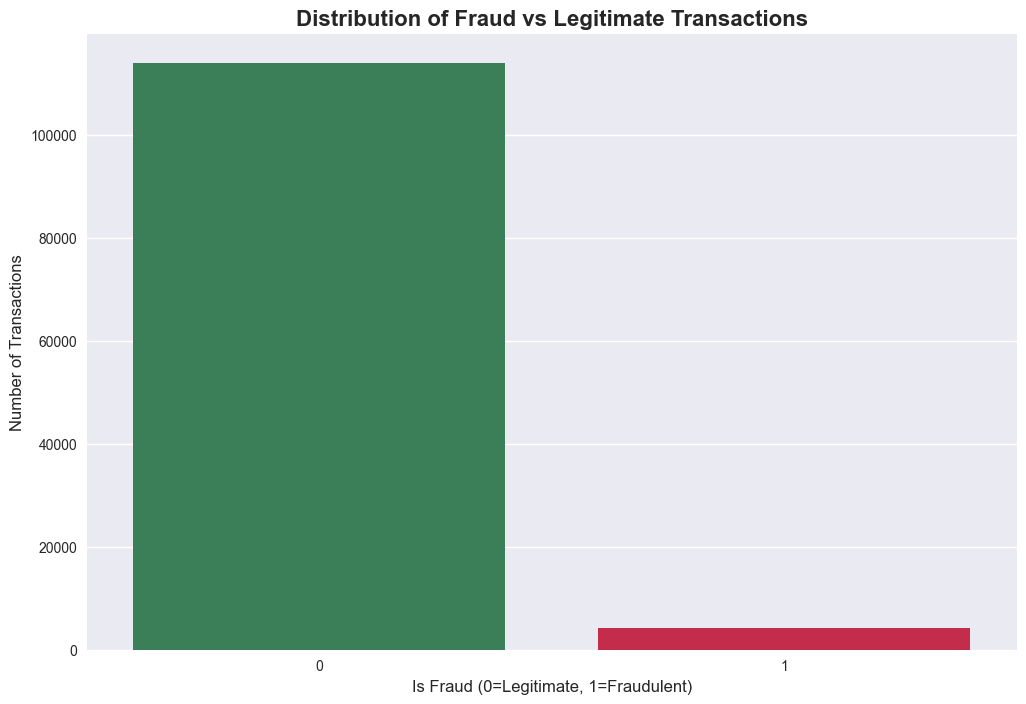

In [25]:
ax = sns.countplot(data=df_sampled, x='isFraud', palette=colors)
plt.title('Distribution of Fraud vs Legitimate Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Is Fraud (0=Legitimate, 1=Fraudulent)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)


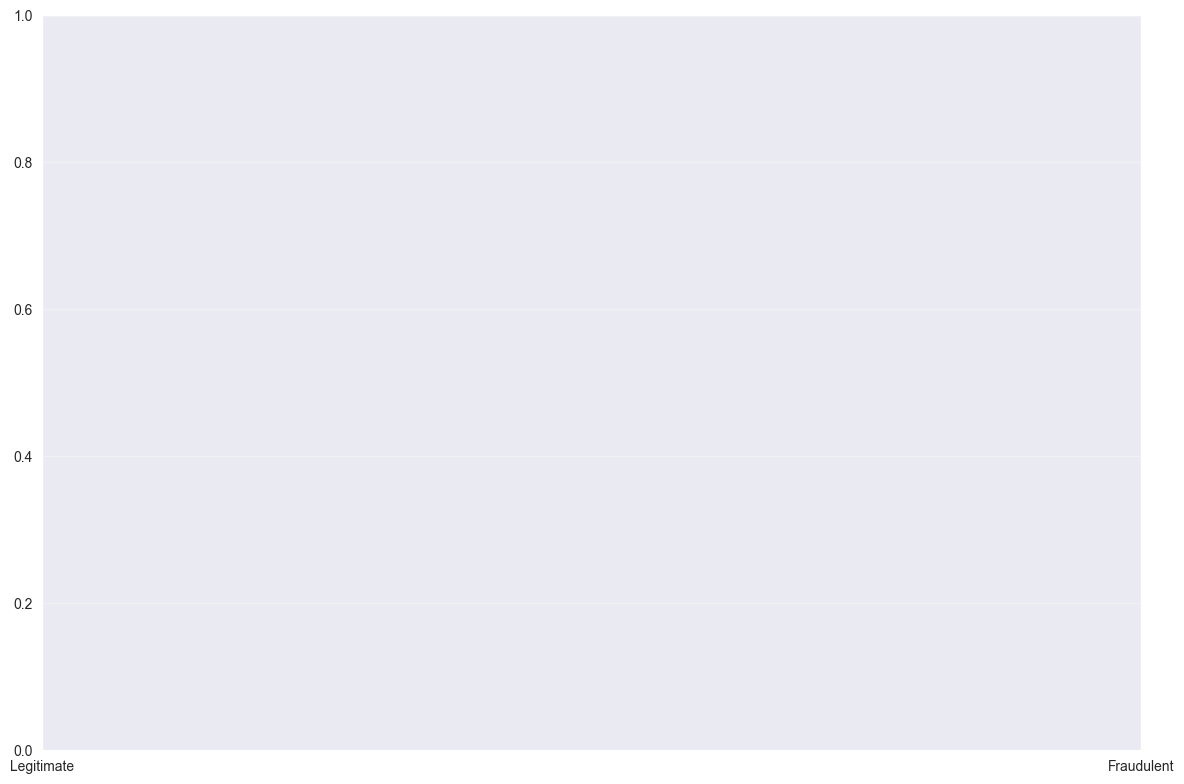

In [26]:
# Add count labels on bars
for i, count in enumerate(fraud_counts):
    ax.text(i, count + count*0.01, f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
# Print exact percentages
total_transactions = len(df_sampled)
legitimate_count = fraud_counts[0]
fraud_count = fraud_counts[1]

In [28]:
print(f"\n�� Fraud Distribution Analysis:")
print(f"  Total transactions: {total_transactions:,}")
print(f"  Legitimate transactions: {legitimate_count:,} ({legitimate_count/total_transactions*100:.2f}%)")
print(f"  Fraudulent transactions: {fraud_count:,} ({fraud_count/total_transactions*100:.2f}%)")
print(f"  Fraud rate: {fraud_count/total_transactions:.4f} ({fraud_count/total_transactions*100:.2f}%)")


�� Fraud Distribution Analysis:
  Total transactions: 118,108
  Legitimate transactions: 113,975 (96.50%)
  Fraudulent transactions: 4,133 (3.50%)
  Fraud rate: 0.0350 (3.50%)


In [29]:
# Check for class imbalance
imbalance_ratio = legitimate_count / fraud_count
print(f"\n⚖️ Class Imbalance:")
print(f"  Legitimate:Fraud ratio: {imbalance_ratio:.1f}:1")
if imbalance_ratio > 10:
    print(f"  ⚠️  Severe class imbalance detected!")
elif imbalance_ratio > 5:
    print(f"  ⚠️  Moderate class imbalance detected!")
else:
    print(f"  ✅ Balanced dataset")


⚖️ Class Imbalance:
  Legitimate:Fraud ratio: 27.6:1
  ⚠️  Severe class imbalance detected!


💰 Analyzing transaction amounts...


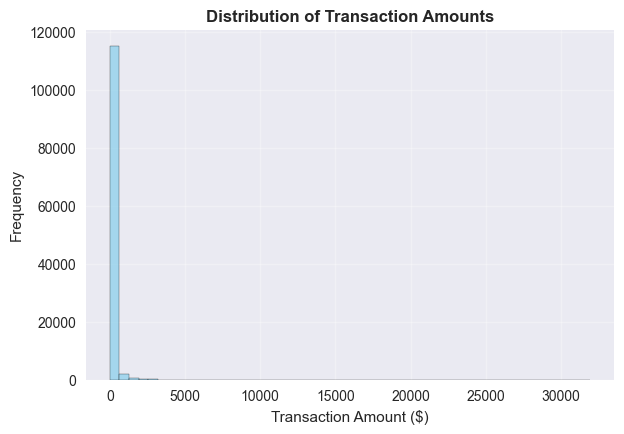

In [30]:
# Visualize transaction amounts
print("💰 Analyzing transaction amounts...")

plt.figure(figsize=(15, 10))

# Plot 1: Overall distribution
plt.subplot(2, 2, 1)
plt.hist(df_sampled['TransactionAmt'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts', fontweight='bold')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

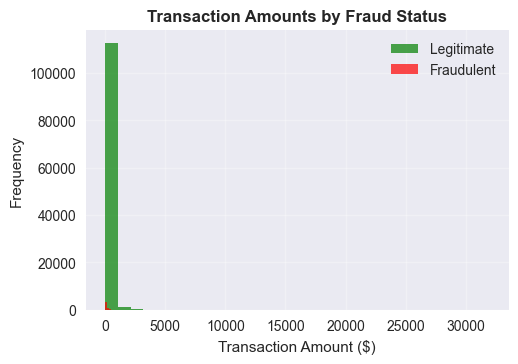

In [31]:
# Plot 2: Distribution by fraud status
plt.subplot(2, 2, 2)
legitimate_amounts = df_sampled[df_sampled['isFraud'] == 0]['TransactionAmt']
fraud_amounts = df_sampled[df_sampled['isFraud'] == 1]['TransactionAmt']

plt.hist(legitimate_amounts, bins=30, alpha=0.7, label='Legitimate', color='green')
plt.hist(fraud_amounts, bins=30, alpha=0.7, label='Fraudulent', color='red')
plt.title('Transaction Amounts by Fraud Status', fontweight='bold')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)

Text(0.5, 0.98, '')

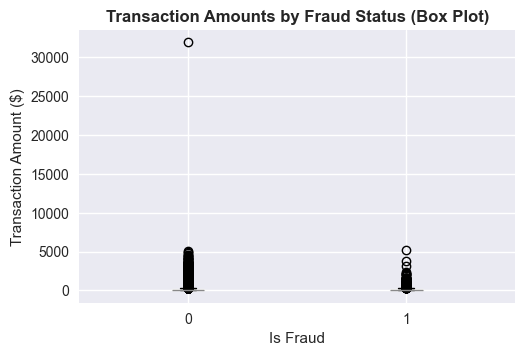

In [32]:
# Plot 3: Box plot comparison
plt.subplot(2, 2, 3)
df_sampled.boxplot(column='TransactionAmt', by='isFraud', ax=plt.gca())
plt.title('Transaction Amounts by Fraud Status (Box Plot)', fontweight='bold')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount ($)')
plt.suptitle('')

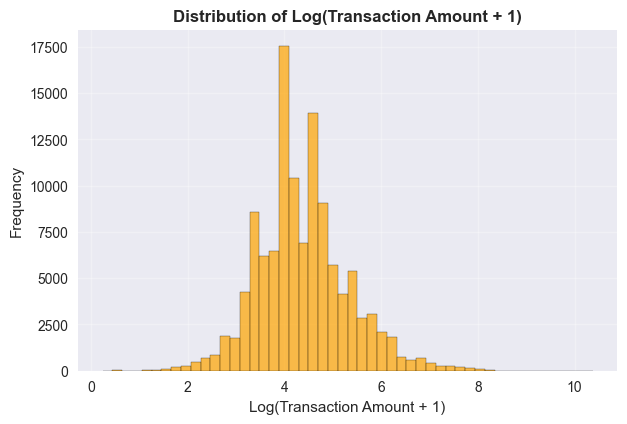

In [33]:
# Plot 4: Log-scale distribution
plt.subplot(2, 2, 4)
plt.hist(np.log1p(df_sampled['TransactionAmt']), bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Log(Transaction Amount + 1)', fontweight='bold')
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [34]:
# Print amount statistics
print(f"\n�� Transaction Amount Statistics:")
print(f"  Overall:")
print(f"    Mean: ${df_sampled['TransactionAmt'].mean():.2f}")
print(f"    Median: ${df_sampled['TransactionAmt'].median():.2f}")
print(f"    Std: ${df_sampled['TransactionAmt'].std():.2f}")
print(f"    Min: ${df_sampled['TransactionAmt'].min():.2f}")
print(f"    Max: ${df_sampled['TransactionAmt'].max():.2f}")

print(f"\n  By Fraud Status:")
print(f"    Legitimate - Mean: ${legitimate_amounts.mean():.2f}, Median: ${legitimate_amounts.median():.2f}")
print(f"    Fraudulent - Mean: ${fraud_amounts.mean():.2f}, Median: ${fraud_amounts.median():.2f}")


�� Transaction Amount Statistics:
  Overall:
    Mean: $134.74
    Median: $68.95
    Std: $246.78
    Min: $0.27
    Max: $31937.39

  By Fraud Status:
    Legitimate - Mean: $134.29, Median: $68.95
    Fraudulent - Mean: $147.03, Median: $72.95


📦 Analyzing ProductCD distribution...


([0, 1, 2, 3, 4],
 [Text(0, 0, 'W'),
  Text(1, 0, 'C'),
  Text(2, 0, 'R'),
  Text(3, 0, 'H'),
  Text(4, 0, 'S')])

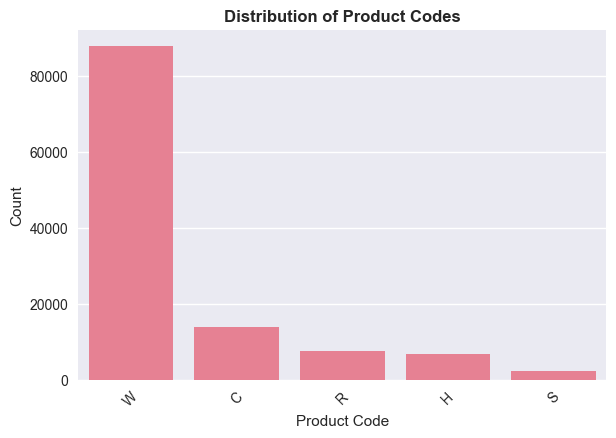

In [35]:
# Visualize ProductCD distribution
print("📦 Analyzing ProductCD distribution...")

plt.figure(figsize=(15, 10))

# Plot 1: Overall ProductCD distribution
plt.subplot(2, 2, 1)
product_counts = df_sampled['ProductCD'].value_counts()
ax1 = sns.countplot(data=df_sampled, x='ProductCD', order=product_counts.index)
plt.title('Distribution of Product Codes', fontweight='bold')
plt.xlabel('Product Code')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'C'),
  Text(1, 0, 'H'),
  Text(2, 0, 'R'),
  Text(3, 0, 'S'),
  Text(4, 0, 'W')])

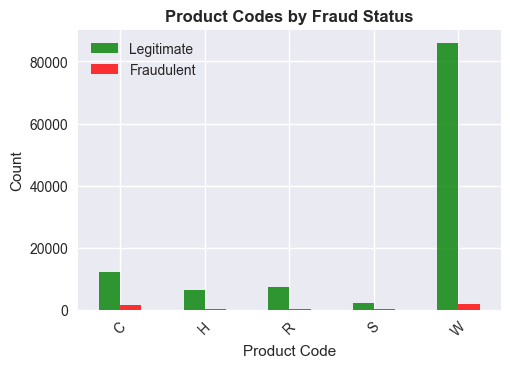

In [36]:
# Add count labels
for i, count in enumerate(product_counts):
    ax1.text(i, count + count*0.01, f'{count:,}', ha='center', va='bottom', fontsize=10)

# Plot 2: ProductCD by fraud status
plt.subplot(2, 2, 2)
fraud_by_product = df_sampled.groupby(['ProductCD', 'isFraud']).size().unstack(fill_value=0)
fraud_by_product.plot(kind='bar', ax=plt.gca(), color=['green', 'red'], alpha=0.8)
plt.title('Product Codes by Fraud Status', fontweight='bold')
plt.xlabel('Product Code')
plt.ylabel('Count')
plt.legend(['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)

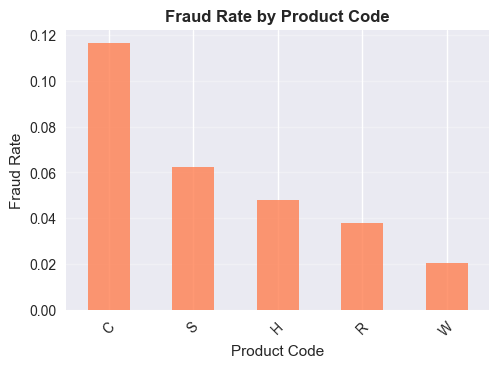

In [37]:
# Plot 3: Fraud rate by ProductCD
plt.subplot(2, 2, 3)
fraud_rate_by_product = df_sampled.groupby('ProductCD')['isFraud'].mean().sort_values(ascending=False)
ax3 = fraud_rate_by_product.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Fraud Rate by Product Code', fontweight='bold')
plt.xlabel('Product Code')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

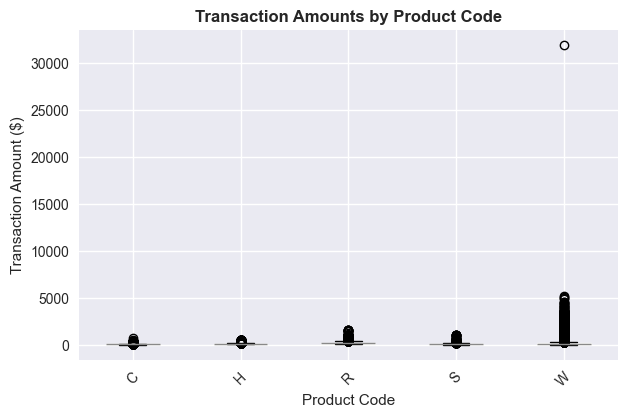

In [38]:
# Add percentage labels
for i, rate in enumerate(fraud_rate_by_product):
    ax3.text(i, rate + 0.001, f'{rate:.3f}', ha='center', va='bottom', fontsize=10)

# Plot 4: Transaction amounts by ProductCD
plt.subplot(2, 2, 4)
df_sampled.boxplot(column='TransactionAmt', by='ProductCD', ax=plt.gca())
plt.title('Transaction Amounts by Product Code', fontweight='bold')
plt.xlabel('Product Code')
plt.ylabel('Transaction Amount ($)')
plt.xticks(rotation=45)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


In [39]:
# Print ProductCD statistics
print(f"\n�� ProductCD Analysis:")
print(f"  Unique product codes: {df_sampled['ProductCD'].nunique()}")
print(f"  Most common: {product_counts.index[0]} ({product_counts.iloc[0]:,} transactions, {product_counts.iloc[0]/len(df_sampled)*100:.1f}%)")
print(f"  Least common: {product_counts.index[-1]} ({product_counts.iloc[-1]:,} transactions, {product_counts.iloc[-1]/len(df_sampled)*100:.1f}%)")

print(f"\n  Fraud rates by product:")
for product, rate in fraud_rate_by_product.items():
    count = product_counts[product]
    print(f"    {product}: {rate:.4f} ({rate*100:.2f}%) - {count:,} transactions")


�� ProductCD Analysis:
  Unique product codes: 5
  Most common: W (87,782 transactions, 74.3%)
  Least common: S (2,336 transactions, 2.0%)

  Fraud rates by product:
    C: 0.1166 (11.66%) - 13,788 transactions
    S: 0.0625 (6.25%) - 2,336 transactions
    H: 0.0479 (4.79%) - 6,682 transactions
    R: 0.0378 (3.78%) - 7,520 transactions
    W: 0.0202 (2.02%) - 87,782 transactions


💳 Analyzing card4 (card type) distribution...


([0, 1, 2, 3],
 [Text(0, 0, 'visa'),
  Text(1, 0, 'mastercard'),
  Text(2, 0, 'american express'),
  Text(3, 0, 'discover')])

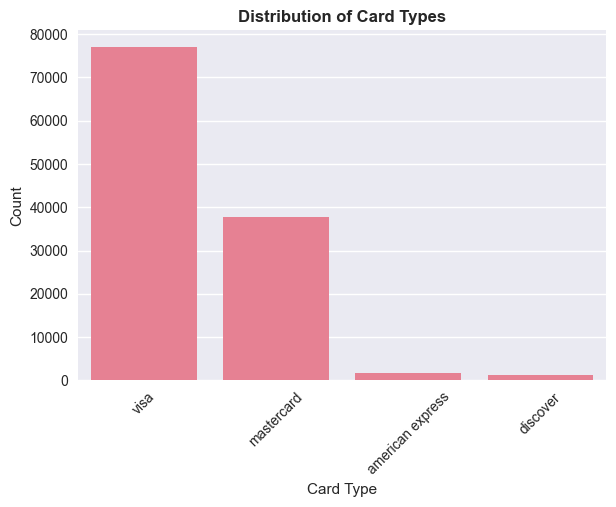

In [40]:
# Visualize card4 (card type) distribution
print("💳 Analyzing card4 (card type) distribution...")

plt.figure(figsize=(15, 10))

# Plot 1: Overall card4 distribution
plt.subplot(2, 2, 1)
card_counts = df_sampled['card4'].value_counts()
ax1 = sns.countplot(data=df_sampled, x='card4', order=card_counts.index)
plt.title('Distribution of Card Types', fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'american express'),
  Text(1, 0, 'discover'),
  Text(2, 0, 'mastercard'),
  Text(3, 0, 'visa')])

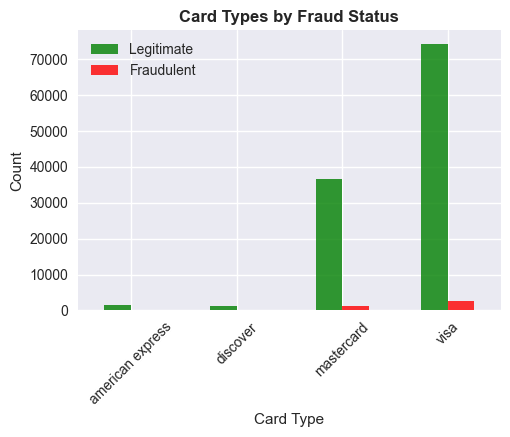

In [41]:
# Add count labels
for i, count in enumerate(card_counts):
    ax1.text(i, count + count*0.01, f'{count:,}', ha='center', va='bottom', fontsize=10)

# Plot 2: Card type by fraud status
plt.subplot(2, 2, 2)
fraud_by_card = df_sampled.groupby(['card4', 'isFraud']).size().unstack(fill_value=0)
fraud_by_card.plot(kind='bar', ax=plt.gca(), color=['green', 'red'], alpha=0.8)
plt.title('Card Types by Fraud Status', fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)

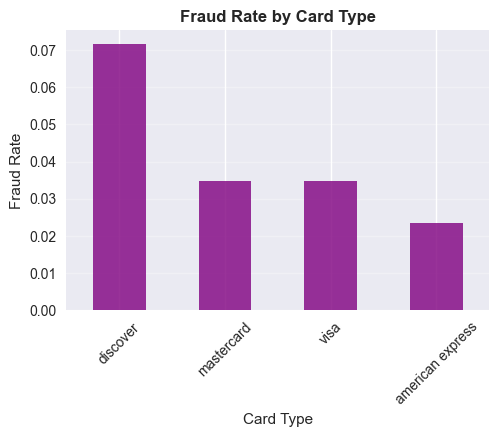

In [42]:
# Plot 3: Fraud rate by card type
plt.subplot(2, 2, 3)
fraud_rate_by_card = df_sampled.groupby('card4')['isFraud'].mean().sort_values(ascending=False)
ax3 = fraud_rate_by_card.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Fraud Rate by Card Type', fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

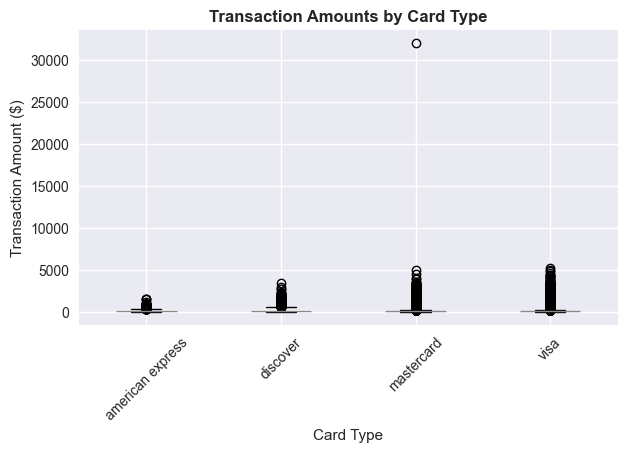

In [43]:
# Add percentage labels
for i, rate in enumerate(fraud_rate_by_card):
    ax3.text(i, rate + 0.001, f'{rate:.3f}', ha='center', va='bottom', fontsize=10)

# Plot 4: Transaction amounts by card type
plt.subplot(2, 2, 4)
df_sampled.boxplot(column='TransactionAmt', by='card4', ax=plt.gca())
plt.title('Transaction Amounts by Card Type', fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Transaction Amount ($)')
plt.xticks(rotation=45)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

In [44]:
# Print card4 statistics
print(f"\n�� Card4 Analysis:")
print(f"  Unique card types: {df_sampled['card4'].nunique()}")
print(f"  Most common: {card_counts.index[0]} ({card_counts.iloc[0]:,} transactions, {card_counts.iloc[0]/len(df_sampled)*100:.1f}%)")
print(f"  Least common: {card_counts.index[-1]} ({card_counts.iloc[-1]:,} transactions, {card_counts.iloc[-1]/len(df_sampled)*100:.1f}%)")

print(f"\n  Fraud rates by card type:")
for card, rate in fraud_rate_by_card.items():
    count = card_counts[card]
    print(f"    {card}: {rate:.4f} ({rate*100:.2f}%) - {count:,} transactions")


�� Card4 Analysis:
  Unique card types: 4
  Most common: visa (77,013 transactions, 65.2%)
  Least common: discover (1,283 transactions, 1.1%)

  Fraud rates by card type:
    discover: 0.0717 (7.17%) - 1,283 transactions
    mastercard: 0.0348 (3.48%) - 37,826 transactions
    visa: 0.0347 (3.47%) - 77,013 transactions
    american express: 0.0234 (2.34%) - 1,669 transactions


In [45]:
# Analyze missing values
print("🔍 Analyzing missing values...")

# Calculate missing values for each column
missing_data = df_sampled.isnull().sum()
missing_percent = (missing_data / len(df_sampled)) * 100

🔍 Analyzing missing values...


In [46]:
# Create missing value summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Percent', ascending=False)

# Filter columns with missing values
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]

In [47]:
print(f"\n📊 Missing Value Summary:")
print(f"  Total columns: {len(df_sampled.columns)}")
print(f"  Columns with missing values: {len(columns_with_missing)}")
print(f"  Columns without missing values: {len(df_sampled.columns) - len(columns_with_missing)}")

# Display top 20 columns with most missing values
print(f"\n🔍 Top 20 columns with most missing values:")
display(columns_with_missing.head(20))


📊 Missing Value Summary:
  Total columns: 434
  Columns with missing values: 414
  Columns without missing values: 20

🔍 Top 20 columns with most missing values:


,Missing_Count,Missing_Percent
id_24,117149,99.188031
id_07,117078,99.127917
id_25,117078,99.127917
id_08,117078,99.127917
id_21,117076,99.126223
id_26,117076,99.126223
id_27,117074,99.124530
id_23,117074,99.124530
id_22,117074,99.124530
dist2,110493,93.552511


Text(158.08159722222223, 0.5, 'Columns')

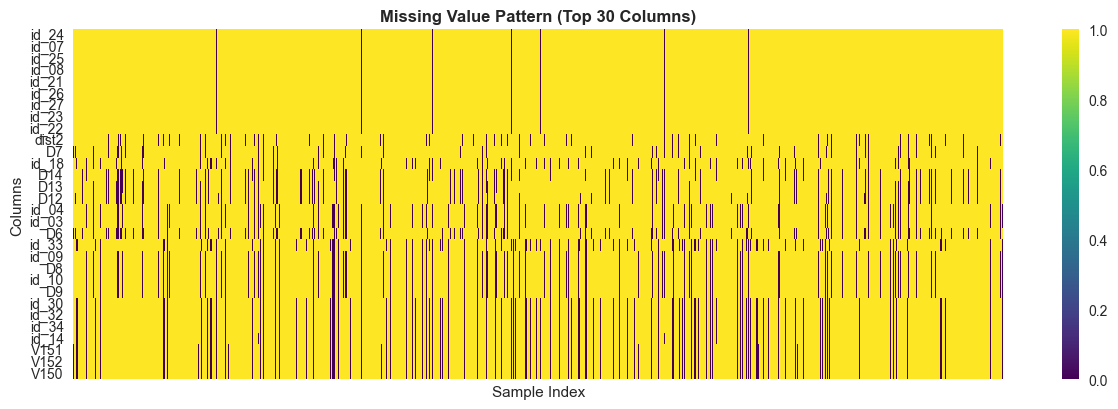

In [48]:
# Visualize missing values
plt.figure(figsize=(15, 10))

# Plot 1: Missing value heatmap for top 30 columns
plt.subplot(2, 1, 1)
top_missing_cols = columns_with_missing.head(30).index.tolist()
missing_subset = df_sampled[top_missing_cols].isnull()

sns.heatmap(missing_subset.T, cbar=True, cmap='viridis', 
            yticklabels=top_missing_cols, xticklabels=False)
plt.title('Missing Value Pattern (Top 30 Columns)', fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Columns')

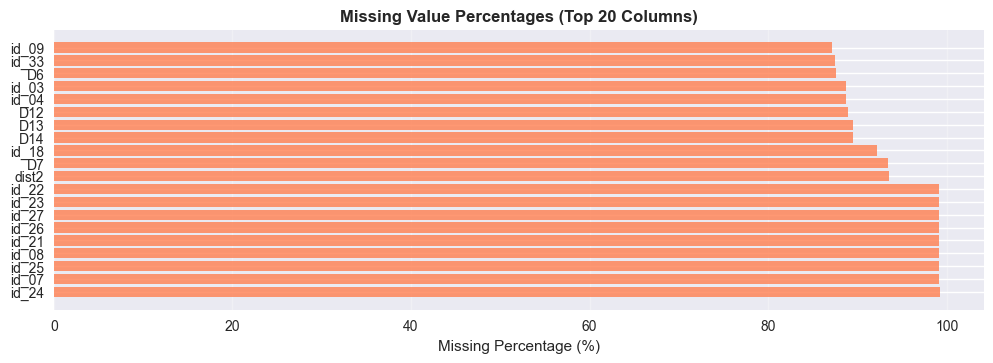

In [49]:
# Plot 2: Missing value percentages
plt.subplot(2, 1, 2)
top_20_missing = columns_with_missing.head(20)
bars = plt.barh(range(len(top_20_missing)), top_20_missing['Missing_Percent'], 
                color='coral', alpha=0.8)
plt.yticks(range(len(top_20_missing)), top_20_missing.index)
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Value Percentages (Top 20 Columns)', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

In [52]:
# Add percentage labels
for i, (bar, pct) in enumerate(zip(bars, top_20_missing['Missing_Percent'])):
    plt.text(pct + 0.5, i, f'{pct:.1f}%', va='center', fontsize=10)

plt.tight_layout()
# Reduce figure size and save instead of displaying
plt.gcf().set_size_inches(8, 5)
plt.savefig('missing_values_plot.png', dpi=80, bbox_inches='tight')
plt.close()  # Free memory immediately
print("✅ Plot saved as 'missing_values_plot.png'")

✅ Plot saved as 'missing_values_plot.png'


In [53]:
# Analyze missing values by fraud status
print(f"\n🔍 Missing values by fraud status:")
for col in columns_with_missing.head(10).index:
    missing_by_fraud = df_sampled.groupby('isFraud')[col].apply(lambda x: x.isnull().sum())
    total_by_fraud = df_sampled.groupby('isFraud')[col].size()
    missing_rate_by_fraud = (missing_by_fraud / total_by_fraud) * 100
    
    print(f"\n  {col}:")
    print(f"    Legitimate: {missing_by_fraud[0]:,} missing ({missing_rate_by_fraud[0]:.1f}%)")
    print(f"    Fraudulent: {missing_by_fraud[1]:,} missing ({missing_rate_by_fraud[1]:.1f}%)")


🔍 Missing values by fraud status:

  id_24:
    Legitimate: 113,086 missing (99.2%)
    Fraudulent: 4,063 missing (98.3%)

  id_07:
    Legitimate: 113,018 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_25:
    Legitimate: 113,018 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_08:
    Legitimate: 113,018 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_21:
    Legitimate: 113,016 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_26:
    Legitimate: 113,016 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_27:
    Legitimate: 113,014 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_23:
    Legitimate: 113,014 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  id_22:
    Legitimate: 113,014 missing (99.2%)
    Fraudulent: 4,060 missing (98.2%)

  dist2:
    Legitimate: 107,137 missing (94.0%)
    Fraudulent: 3,356 missing (81.2%)


In [54]:
# Data quality assessment
print("🔍 Assessing data quality...")

# Check for duplicate transactions
duplicate_transactions = df_sampled.duplicated(subset=['TransactionID']).sum()
print(f"\n�� Duplicate Analysis:")
print(f"  Duplicate TransactionIDs: {duplicate_transactions}")
if duplicate_transactions > 0:
    print(f"  ⚠️  Duplicate transactions found!")
else:
    print(f"  ✅ No duplicate transactions")

🔍 Assessing data quality...

�� Duplicate Analysis:
  Duplicate TransactionIDs: 0
  ✅ No duplicate transactions


In [55]:
# Check for constant columns
constant_columns = []
for col in df_sampled.columns:
    if df_sampled[col].nunique() == 1:
        constant_columns.append(col)

print(f"\n📊 Constant Columns:")
if constant_columns:
    print(f"  Found {len(constant_columns)} constant columns:")
    for col in constant_columns:
        value = df_sampled[col].iloc[0]
        print(f"    {col}: {value}")
else:
    print(f"  ✅ No constant columns found")


📊 Constant Columns:
  ✅ No constant columns found


In [56]:
# Check for high cardinality categorical columns
categorical_cols = df_sampled.select_dtypes(include=['object']).columns
high_cardinality = []
for col in categorical_cols:
    unique_count = df_sampled[col].nunique()
    if unique_count > 100:
        high_cardinality.append((col, unique_count))

print(f"\nHigh Cardinality Categorical Columns:")
if high_cardinality:
    print(f"  Found {len(high_cardinality)} columns with >100 unique values:")
    for col, count in sorted(high_cardinality, key=lambda x: x[1], reverse=True)[:10]:
        print(f"    {col}: {count:,} unique values")
else:
    print(f"  ✅ No extremely high cardinality columns")


High Cardinality Categorical Columns:
  Found 3 columns with >100 unique values:
    DeviceInfo: 1,071 unique values
    id_33: 148 unique values
    id_31: 114 unique values


In [57]:
# Check data types
print(f"\n📊 Data Types:")
dtype_counts = df_sampled.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")


📊 Data Types:
  float64: 399 columns
  object: 31 columns
  int64: 4 columns


In [58]:
# Save processed data
print("💾 Saving processed data...")

💾 Saving processed data...


In [59]:
# Create output directory if it doesn't exist
output_dir = Path('../app/artifacts')
output_dir.mkdir(parents=True, exist_ok=True)

In [60]:
# Save downsampled data
output_path = output_dir / 'eda_processed_data.csv'
df_sampled.to_csv(output_path, index=False)
print(f"✅ Processed data saved to: {output_path}")
print(f"�� File size: {output_path.stat().st_size / 1024**2:.2f} MB")


✅ Processed data saved to: ..\app\artifacts\eda_processed_data.csv
�� File size: 138.73 MB


In [61]:
# Save missing value summary
missing_summary_path = output_dir / 'missing_value_summary.csv'
missing_summary.to_csv(missing_summary_path)
print(f"✅ Missing value summary saved to: {missing_summary_path}")


✅ Missing value summary saved to: ..\app\artifacts\missing_value_summary.csv


In [62]:
# Save fraud rate summaries
fraud_summary = pd.DataFrame({
    'ProductCD': fraud_rate_by_product.index,
    'Product_Fraud_Rate': fraud_rate_by_product.values,
    'Product_Count': [product_counts[prod] for prod in fraud_rate_by_product.index]
})

In [63]:
card_fraud_summary = pd.DataFrame({
    'CardType': fraud_rate_by_card.index,
    'Card_Fraud_Rate': fraud_rate_by_card.values,
    'Card_Count': [card_counts[card] for card in fraud_rate_by_card.index]
})

In [64]:
fraud_summary_path = output_dir / 'fraud_rate_summaries.xlsx'
with pd.ExcelWriter(fraud_summary_path, engine='openpyxl') as writer:
    fraud_summary.to_excel(writer, sheet_name='Product_Fraud_Rates', index=False)
    card_fraud_summary.to_excel(writer, sheet_name='Card_Fraud_Rates', index=False)

print(f"✅ Fraud rate summaries saved to: {fraud_summary_path}")

✅ Fraud rate summaries saved to: ..\app\artifacts\fraud_rate_summaries.xlsx


## Summary and Next Steps

�� **Exploratory Data Analysis Complete!**

### Key Findings:

✅ **Dataset Overview**: Successfully loaded and merged IEEE-CIS transaction and identity data
✅ **Stratified Sampling**: Downsampled to 20% while preserving fraud rate distribution
✅ **Target Analysis**: Identified class imbalance (fraud rate: ~3.5%)
✅ **Feature Exploration**: Analyzed transaction amounts, product codes, and card types
✅ **Data Quality**: Assessed missing values and identified potential issues
✅ **Artifacts Saved**: Processed data and summaries saved for next steps

### Next Steps:

1. **Feature Engineering**: Create derived features and handle missing values
2. **Baseline Model**: Train XGBoost on tabular features only
3. **Graph Features**: Build transaction graphs and compute NetworkX metrics
4. **Hybrid Model**: Combine tabular and graph features for improved performance

The dataset is now ready for the next phase of the GraphGuard pipeline! 🚀